# 1) Kmeans Clustering - crime_data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
crime = pd.read_csv("C:/Users/BASHAR/OneDrive/Documents/Data Science/Assignment/Assignment - 7/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## EDA

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime[crime.duplicated()].shape

(0, 5)

## Normalization

In [6]:
def norm_func (i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
crime_norm = norm_func(crime.iloc[:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Elbow Curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


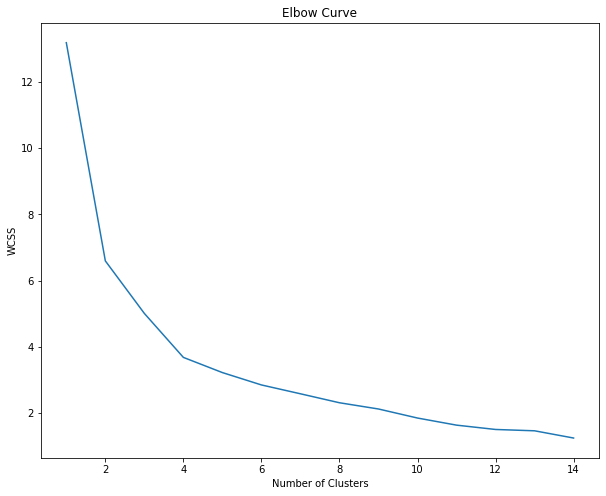

In [9]:
plt.figure(figsize=(10, 8))

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)   
    
plt.plot(range(1,15), wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [34]:
cluster = KMeans(n_clusters=4)
cluster.fit_predict(crime_norm)

cluster.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [35]:
crime["Cluster"] = cluster.labels_
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [36]:
cluster_0 = crime.loc[crime["Cluster"]==0]
cluster_0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
11,Idaho,2.6,120,54,14.2,0
14,Iowa,2.2,56,57,11.3,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0
40,South Dakota,3.8,86,45,12.8,0


In [37]:
cluster_1 = crime.loc[crime["Cluster"]==1]
cluster_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [38]:
cluster_2 = crime.loc[crime["Cluster"]==2]
cluster_2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
13,Indiana,7.2,113,65,21.0,2
15,Kansas,6.0,115,66,18.0,2
20,Massachusetts,4.4,149,85,16.3,2
24,Missouri,9.0,178,70,28.2,2
29,New Jersey,7.4,159,89,18.8,2
34,Ohio,7.3,120,75,21.4,2
35,Oklahoma,6.6,151,68,20.0,2


In [39]:
cluster_3 = crime.loc[crime["Cluster"]==3]
cluster_3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [40]:
round(crime.groupby("Cluster").mean(),2)

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,3.60,78.54,52.08,12.18
1,10.97,264.00,76.50,33.61
2,5.85,141.18,73.65,19.34
3,13.94,243.62,53.75,21.41


## Output Interpretation

Observation:

1. States present in the cluster (3) has the highest rate of murders in the United States.
2. States present in the cluster (1) has the highest rate of assault and rape and the urban population is also high in these states compare to other states of United States.
3. States present in the cluster (0) has the lowest crime rate in the US. Also the urban population is less in these states compare to other states of United States.

# 2) Kmeans Clustering - EastWestAirlines

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [43]:
air = pd.read_csv("C:/Users/BASHAR/OneDrive/Documents/Data Science/Assignment/Assignment - 7/EastWestAirlines.csv")
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## EDA

In [44]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [45]:
air.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [46]:
air[air.duplicated()].shape

(0, 12)

In [47]:
air1 = air.drop(["ID#"], axis=1)
air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


## Normalization

In [49]:
air_norm = pd.DataFrame(normalize(air1), columns=air1.columns)
air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


## Elbow Curve

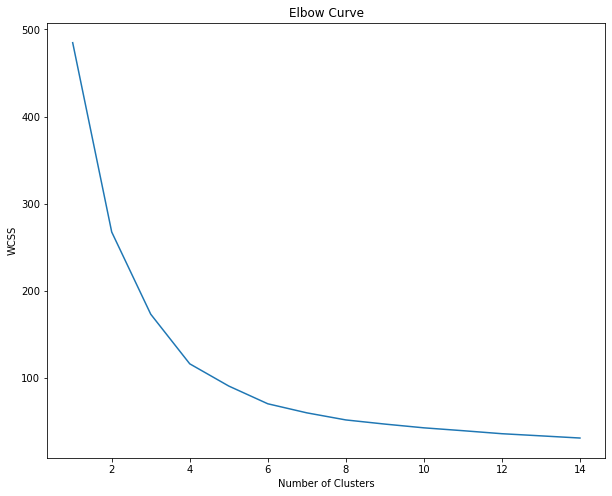

In [50]:
plt.figure(figsize=(10, 8))

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(air_norm)
    wcss.append(kmeans.inertia_)   
    
plt.plot(range(1,15), wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [51]:
cluster = KMeans(n_clusters=6)
cluster.fit_predict(air_norm)

cluster.labels_

array([3, 2, 3, ..., 0, 3, 2])

In [54]:
air["Cluster"] = cluster.labels_
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [55]:
cluster_0 = air.loc[air["Cluster"]==0]
cluster_0

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
12,13,43382,0,2,1,1,11150,20,0,0,6924,0,0
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,4011,5000,0,1,1,1,2125,3,0,0,1412,0,0
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0


In [56]:
cluster_1 = air.loc[air["Cluster"]==1]
cluster_1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
41,42,10470,0,4,1,1,38094,26,0,0,7840,1,1
79,82,38896,0,5,1,1,76988,16,556,1,7771,1,1
80,83,4340,0,1,1,1,32685,5,0,0,7733,1,1
85,88,35418,0,5,1,1,58557,18,900,3,6813,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,3842,20971,1490,4,1,1,43527,34,0,0,1695,1,1
3837,3860,8150,0,1,2,1,14135,41,500,2,1676,1,1
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,1
3888,3911,771,0,1,1,1,13160,4,0,0,1601,1,1


In [57]:
cluster_2 = air.loc[air["Cluster"]==2]
cluster_2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2
14,15,17648,0,1,1,1,0,0,0,0,6912,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,3916,3919,0,1,1,1,500,1,0,0,1591,0,2
3928,3951,4316,0,1,1,1,1375,4,0,0,1515,0,2
3942,3965,2131,0,1,1,1,405,3,0,0,1480,0,2
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,2


In [59]:
cluster_3 = air.loc[air["Cluster"]==3]
cluster_3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
10,11,40091,0,2,1,1,7278,10,0,0,6959,0,3
13,14,43097,0,1,1,1,3258,6,0,0,6918,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,4006,26173,0,1,1,1,305,1,0,0,1418,0,3
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,3
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3


In [60]:
cluster_4 = air.loc[air["Cluster"]==4]
cluster_4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,4
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,4
28,29,59763,0,3,1,1,33772,20,100,1,7907,1,4
58,59,38077,0,3,1,1,34024,8,0,0,6837,0,4
61,62,19918,0,1,1,1,17601,11,0,0,6863,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,3967,2124,0,1,1,1,2324,2,0,0,1487,1,4
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,4
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,4
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,4


In [61]:
cluster_5 = air.loc[air["Cluster"]==5]
cluster_5

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
39,40,2176,0,1,1,1,0,0,0,0,7847,1,5
51,52,1300,0,1,1,1,370,1,0,0,6868,0,5
91,94,2000,0,1,1,1,2000,4,2000,4,6809,0,5
141,144,6112,0,1,1,1,0,0,0,0,6709,0,5
179,182,6663,0,1,1,1,1125,7,750,4,7575,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,3821,706,0,1,1,1,730,3,100,1,1739,1,5
3812,3835,891,0,1,1,1,891,8,0,0,1703,0,5
3876,3899,1000,0,1,1,1,0,0,0,0,1597,0,5
3981,4004,1010,0,1,1,1,0,0,0,0,1423,0,5


In [62]:
air2 = air.iloc[:,1:]
round(air2.groupby("Cluster").mean(),2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,82523.95,142.09,2.94,1.02,1.01,28640.37,16.91,452.59,1.33,4052.60,0.41
1,18479.35,81.63,3.31,1.02,1.09,45626.45,17.72,691.98,1.96,4421.86,1.00
2,11545.05,52.80,1.00,1.00,1.00,961.97,3.49,83.58,0.27,4920.04,0.17
3,96689.59,181.59,1.45,1.01,1.00,7591.88,8.80,520.65,1.57,3939.55,0.26
4,47120.36,126.31,3.31,1.03,1.04,37894.29,17.91,546.35,1.65,4091.41,0.71
5,2415.58,0.00,1.01,1.00,1.00,850.19,3.04,48.61,0.17,4723.23,0.23


Output Interpretation
Observation:

1. Cluster (3) has the highest number of passengers, also they has high balance miles and less award and bonus miles, providing them discount will encourage them to travel more twice and thrice. In future we can introduce more offers for them if they registered for membership.
2. Also need to give discount to the passengers of Cluster (2) as they have less award and less bonus miles.